In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.plotly as py
import plotly.graph_objs as go
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import os
import time

#Setting options
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

#Set Default option
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_rows = 3000

In [2]:
income = pd.read_csv('C:/Users/rishu/Documents/OneDrive/Desktop/ML/HW2_Kunal/adult.csv')

In [3]:
income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
income.shape

(32561, 15)

In [5]:
print(income.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [6]:
income['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [7]:
income['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [8]:
def a(x):
    return sum(x=='?')
income.apply(a)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
#removing all rows with '?'
income = income[(income != '?').all(axis=1)]

In [10]:
income.shape

(30162, 15)

In [11]:
income.occupation.value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [12]:
income.income.value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [13]:
#setting '<=50K'=0 and '>=50K'=1
income['income']=income['income'].map({'<=50K':0, '>50K':1})

In [14]:
income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [15]:
income.income.value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [16]:
income['capital.gain'].value_counts()

0        27624
15024      337
7688       270
7298       240
99999      148
3103        94
5178        91
5013        69
4386        67
3325        53
8614        52
2174        46
10520       43
4650        40
4064        40
14084       39
3137        36
20051       33
27828       32
3908        31
2829        30
594         28
6849        26
14344       26
13550       25
4787        22
2885        22
3411        21
1055        21
2597        20
2176        20
3464        20
4101        19
2407        18
9386        16
4865        16
2202        15
1506        14
3674        13
2580        12
3942        12
25236       11
5455        11
4416        11
6497        11
2463        11
4508        11
2354        10
2635        10
2907        10
3781        10
10605        9
914          8
2977         8
7430         8
2105         8
1151         8
3471         7
1471         7
1831         7
4934         7
6418         7
3887         6
2964         6
114          6
10566        6
3273      

# Exploratory Data Analysis

In [17]:
import plotly.figure_factory as ff

In [18]:
income.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

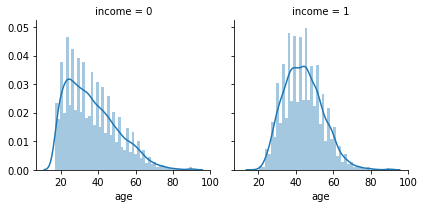

In [19]:
#Numeric Variables
#age vs income
age_inc = sns.FacetGrid(income, col='income')
age_inc = age_inc.map(sns.distplot, 'age')

#For income = 1 the distribution is normal and for income = 0 the distribution is rightly skewed

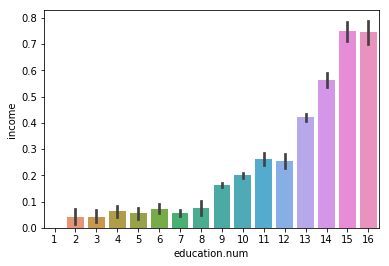

In [20]:
sns.barplot(income['education.num'],income['income'])
#as the number of years of education increases the probability of income being greater than 50 K increases

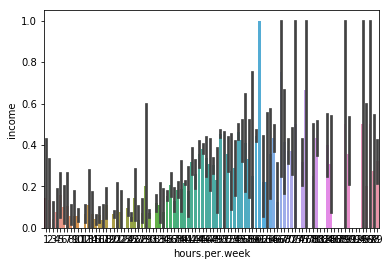

In [21]:
sns.barplot(income['hours.per.week'],income['income'])

In [22]:
income['marital.status'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64

In [23]:
income.race.value_counts()

#no of whites is too large, it can make the model biased so we can drop 'race'

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

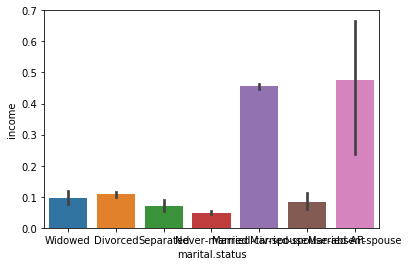

In [24]:
sns.barplot(income['marital.status'],income['income'])

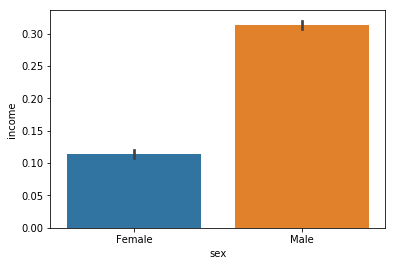

In [25]:
sns.barplot(income['sex'],income['income'])

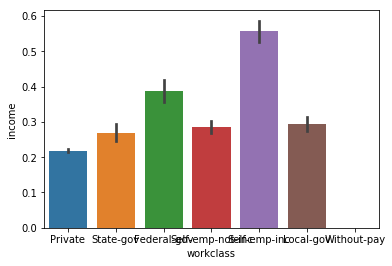

In [26]:
sns.barplot(income['workclass'],income['income'])


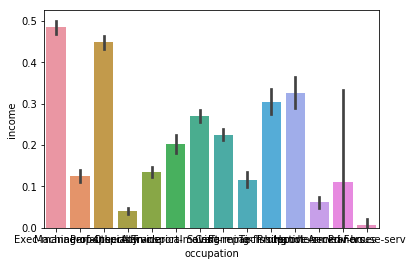

In [27]:
sns.barplot(income['occupation'],income['income'])

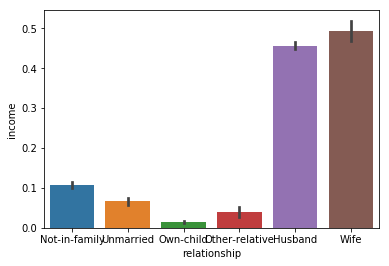

In [28]:
sns.barplot(income['relationship'],income['income'])

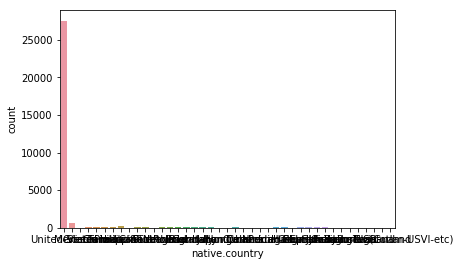

In [29]:
sns.countplot(income['native.country'])

In [30]:
income['native.country'].value_counts()
#Count of United States is too high. we can drop this column 

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

# Feature Engineering

In [31]:
# Converting Sex to 0 and 1
income["sex"] = income["sex"].map({"Male": 0, "Female":1})

In [32]:
income['marital.status'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64

In [33]:
#Converting marrital.status to 0 (single) and 1(married)
income['marital.status']=income['marital.status'].map({'Married-civ-spouse':1, 'Never-married':0, 'Divorced':0, 'Separated':0, 
'Widowed':0, 'Married-spouse-absent':1, 'Married-AF-spouse':1})

In [34]:
from sklearn.preprocessing import LabelEncoder

for column in income:
    enc=LabelEncoder()
    if income.dtypes[column]==np.object:
         income[column]=enc.fit_transform(income[column])

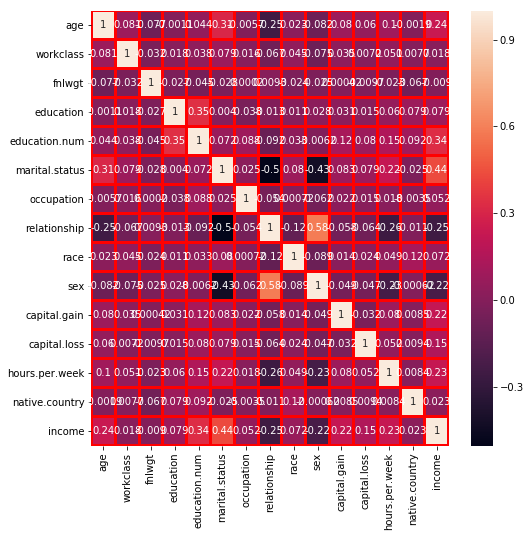

In [35]:
#plotting correlation matrix with all the features
plt.figure(figsize=(8,8))
hm=income.corr()
sns.heatmap(hm,annot= True,linecolor='red',linewidths=2)

In [36]:
income.occupation.value_counts()

9     4038
2     4030
3     3992
0     3721
11    3584
7     3212
6     1966
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: occupation, dtype: int64

In [37]:
import pandas_profiling
pandas_profiling.ProfileReport(income)

In [38]:
#dropping column that will not be used for modelling
#we can drop education as it is similar to education.num as they are relatively highly correlated and similar in nature
#even relationship and marital.status are correlated
#further workclass, race and native.country can also be dropped

income=income.drop(['relationship','education', 'workclass','race','native.country'],axis=1)

In [39]:
income.head()

,age,fnlwgt,education.num,marital.status,occupation,sex,capital.gain,capital.loss,hours.per.week,income
1,82,132870,9,0,3,1,0,4356,18,0
3,54,140359,4,0,6,1,0,3900,40,0
4,41,264663,10,0,9,1,0,3900,40,0
5,34,216864,9,0,7,1,0,3770,45,0
6,38,150601,6,0,0,0,0,3770,40,0


# Modeling

In [40]:
import sklearn as sk
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, cross_val_score

In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [42]:
X_unscaled = income.loc[:,'age':'hours.per.week']

In [43]:
y_unscaled = income.loc[:,'income']

In [44]:
X_unscaled.shape

(30162, 9)

In [45]:
y_unscaled.shape

(30162,)

In [46]:
#Splitting dataset in train and test in the ratio 70-30
X_train, X_test, y_train, y_test = train_test_split(X_unscaled,y_unscaled,test_size=0.3,random_state=42)

In [47]:
#scaling the features 
X_train = ss.fit_transform(X_train)

In [48]:
X_train

array([[ 1.57520193, -0.5491592 , -0.43960958, ..., -0.14796613,
        -0.21958513, -0.07652636],
       [-0.8699866 ,  0.0069401 , -0.43960958, ..., -0.14796613,
        -0.21958513,  0.33867153],
       [-1.40487159,  0.07373423, -0.04856357, ..., -0.14796613,
        -0.21958513, -0.07652636],
       ...,
       [-1.02281088,  0.03436095,  1.12457447, ..., -0.14796613,
         4.38909451, -0.07652636],
       [-0.25868946, -0.6881958 ,  1.12457447, ..., -0.14796613,
        -0.21958513,  0.75386943],
       [-0.8699866 , -0.46482289, -0.43960958, ..., -0.14796613,
        -0.21958513,  1.58426522]])

In [49]:
X_train.shape

(21113, 9)

In [50]:
X_test = ss.fit_transform(X_test)

In [51]:
X_test.shape

(9049, 9)

# Support Vector Machine

In [52]:
from sklearn.model_selection import cross_validate

In [53]:
def a(clf,X_train, y_train):
    scores = cross_validate(clf, X_train, y_train,cv=3, return_train_score=True)
    return scores

In [54]:
clf = svm.SVC(kernel='linear', C=0.1)
score1=a(clf,X_train,y_train)
clf = svm.SVC(kernel='linear', C=1)
score2=a(clf,X_train,y_train)
clf = svm.SVC(kernel='linear', C=10)
score3=a(clf,X_train,y_train)
clf = svm.SVC(kernel='linear', C=100)
score4=a(clf,X_train,y_train)

In [55]:
print(score1)
print(score2)
print(score3)
print(score4)

{'fit_time': array([2.90622449, 2.75462914, 2.35869145]), 'score_time': array([0.436831  , 0.42386603, 0.45278883]), 'test_score': array([0.83773799, 0.83901677, 0.8416939 ]), 'train_score': array([0.84007105, 0.83907638, 0.83851947])}
{'fit_time': array([4.70940423, 5.3407166 , 5.87927127]), 'score_time': array([0.51661706, 0.59041882, 0.40990472]), 'test_score': array([0.83702756, 0.83859051, 0.84140969]), 'train_score': array([0.83971581, 0.83865009, 0.83873259])}
{'fit_time': array([13.9287498 , 13.78811789, 14.66377544]), 'score_time': array([0.45078802, 0.65823865, 0.38895941]), 'test_score': array([0.83688548, 0.83873259, 0.8415518 ]), 'train_score': array([0.8398579 , 0.83865009, 0.83866155])}
{'fit_time': array([78.97474813, 65.23497248, 67.08705997]), 'score_time': array([0.35907865, 0.35903764, 0.41688418]), 'test_score': array([0.83702756, 0.83859051, 0.84126759]), 'train_score': array([0.83978686, 0.83886323, 0.83880364])}


In [56]:
s1=pd.DataFrame.from_dict(score1)
s2=pd.DataFrame.from_dict(score2)
s3=pd.DataFrame.from_dict(score3)
s4=pd.DataFrame.from_dict(score4)

In [57]:
## Train and Test Accuracy for Linear SVM Kernel function
s1_linear_test=[s1[['test_score']].mean(axis=0),s2[['test_score']].mean(axis=0),s3[['test_score']].mean(axis=0),s4[['test_score']].mean(axis=0)]
s1_linear_train=[s1[['train_score']].mean(axis=0),s2[['train_score']].mean(axis=0),s3[['train_score']].mean(axis=0),s4[['train_score']].mean(axis=0)]
c=[0.1,1,10,100]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for SVM_Linear kernel as a function of C')

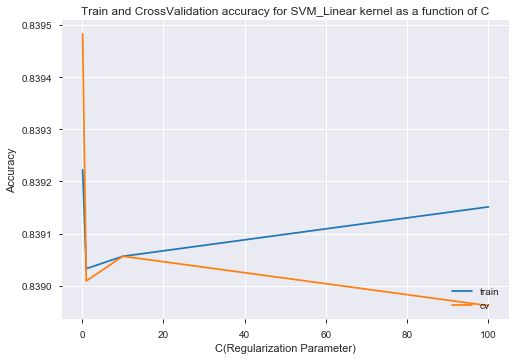

In [58]:
## Learning curve for Train and Test accuracy for Linear SVM function for various values of C
plt.plot(c,s1_linear_train,label='train')
plt.plot(c,s1_linear_test,label='cv')
plt.xlabel("C(Regularization Parameter)")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title("Train and CrossValidation accuracy for SVM_Linear kernel as a function of C")

In [59]:
clf = svm.SVC(kernel='rbf', C=0.1)
score5=a(clf,X_train,y_train)
clf = svm.SVC(kernel='rbf', C=1)
score6=a(clf,X_train,y_train)

In [60]:
print(score5)
print(score6)

{'fit_time': array([3.59139204, 3.65522242, 3.24332309]), 'score_time': array([1.02525711, 0.86967373, 0.85970068]), 'test_score': array([0.8397272 , 0.84185848, 0.84368339]), 'train_score': array([0.84362345, 0.84426288, 0.84242683])}
{'fit_time': array([3.25629187, 3.36300182, 3.50562191]), 'score_time': array([0.77991343, 0.78988934, 0.77891588]), 'test_score': array([0.84356351, 0.84256891, 0.84666761]), 'train_score': array([0.84973357, 0.85023091, 0.84739983])}


In [61]:
s5=pd.DataFrame.from_dict(score5)
s6=pd.DataFrame.from_dict(score6)

In [62]:
## Train and Test Accuracy for rbf SVM Kernel function
s1_rbf_test=[s5[['test_score']].mean(axis=0),s6[['test_score']].mean(axis=0)]
s1_rbf_train=[s5[['train_score']].mean(axis=0),s6[['train_score']].mean(axis=0)]
C=[0.1,1]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for SVM_rbf kernel as a function of degree')

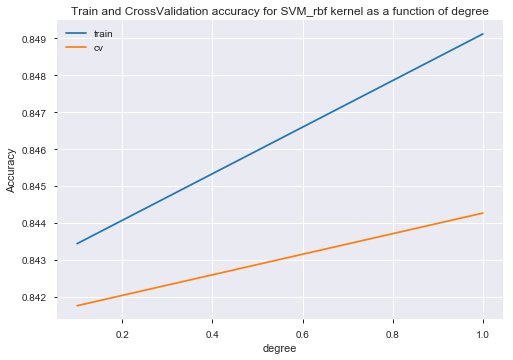

In [63]:
plt.plot(C,s1_rbf_train,label='train')
plt.plot(C,s1_rbf_test,label='cv')
plt.xlabel("degree")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.title("Train and CrossValidation accuracy for SVM_rbf kernel as a function of degree")

In [64]:
## Support Vector Machine with Sigmoid function
clf = svm.SVC(kernel='sigmoid', C=0.1)
score8=a(clf,X_train,y_train)
clf = svm.SVC(kernel='sigmoid', C=1)
score9=a(clf,X_train,y_train)
clf = svm.SVC(kernel='sigmoid', C=10)
score10=a(clf,X_train,y_train)
clf = svm.SVC(kernel='sigmoid', C=100)
score11=a(clf,X_train,y_train)

In [65]:
print(score8)
print(score9)
print(score10)
print(score11)

{'fit_time': array([3.32510448, 2.89425826, 5.02356482]), 'score_time': array([0.85172248, 0.78589654, 1.30051899]), 'test_score': array([0.78289287, 0.78488207, 0.7871252 ]), 'train_score': array([0.78330373, 0.78614565, 0.78196931])}
{'fit_time': array([3.54252386, 3.84172225, 3.79084134]), 'score_time': array([0.68616438, 0.76695085, 0.80584407]), 'test_score': array([0.76896846, 0.76840011, 0.77149353]), 'train_score': array([0.76980462, 0.77065719, 0.76776073])}
{'fit_time': array([2.82643819, 3.07976031, 2.63195705]), 'score_time': array([0.66422343, 0.80584741, 0.70710969]), 'test_score': array([0.76882637, 0.76726343, 0.77092511]), 'train_score': array([0.7687389 , 0.77058615, 0.76669508])}
{'fit_time': array([3.48020363, 4.86897635, 2.84039998]), 'score_time': array([0.90857935, 0.6911509 , 0.70810771]), 'test_score': array([0.76825803, 0.76726343, 0.77049879]), 'train_score': array([0.76880995, 0.770373  , 0.76712134])}


In [66]:
s8=pd.DataFrame.from_dict(score8)
s9=pd.DataFrame.from_dict(score9)
s10=pd.DataFrame.from_dict(score10)
s11=pd.DataFrame.from_dict(score11)

In [67]:
## Train and Test accuracy for sigmoid Kernel function 
s1_sig_test=[s8[['test_score']].mean(axis=0),s9[['test_score']].mean(axis=0),s10[['test_score']].mean(axis=0),s11[['test_score']].mean(axis=0)]
s1_sig_train=[s8[['train_score']].mean(axis=0),s9[['train_score']].mean(axis=0),s10[['train_score']].mean(axis=0),s11[['train_score']].mean(axis=0)]
C=[0.1,1,10,100]

Text(0.5, 1.0, 'Train and CrossValidation accuracy for SVM_sigmoid kernel as a function of C')

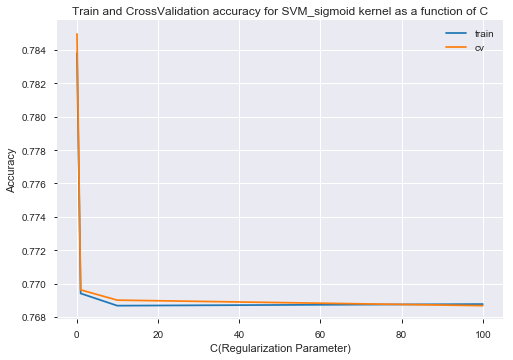

In [68]:
plt.plot(C,s1_sig_train,label='train')
plt.plot(C,s1_sig_test,label='cv')
plt.xlabel("C(Regularization Parameter)")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title("Train and CrossValidation accuracy for SVM_sigmoid kernel as a function of C")

In [69]:
#### Fitting the functions on the complete training set with best parameters
## SVM Functions 
clf1 = svm.SVC(kernel='linear', C=10)
clf1.fit(X_train,y_train)

clf2 = svm.SVC(kernel='rbf', C=1)
clf2.fit(X_train,y_train)

clf3 = svm.SVC(kernel='sigmoid', C=0.1)
clf3.fit(X_train,y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [71]:
## for SVM-Linear
print(confusion_matrix(y_test,y_pred1))  
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

[[6290  464]
 [1020 1275]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6754
           1       0.73      0.56      0.63      2295

    accuracy                           0.84      9049
   macro avg       0.80      0.74      0.76      9049
weighted avg       0.83      0.84      0.83      9049

0.8360039783401481


In [72]:
#Applying K-fold cross validation with 10 splits for model trained with clf1
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
score=cross_val_score(clf1,X = X_train, y = y_train, cv=kfold)
print('Cross-validation score:{}\n'.format(score))
print('Average Cross-validation score:{}\n'.format(score.mean()))

Cross-validation score:[0.83522727 0.83996212 0.84280303 0.84557082 0.82472762 0.8446234
 0.8237802  0.84272856 0.8394126  0.84699195]

Average Cross-validation score:0.8385827573460803



In [73]:
## for SVM-rbf
print(confusion_matrix(y_test,y_pred2))  
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

[[6371  383]
 [1032 1263]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6754
           1       0.77      0.55      0.64      2295

    accuracy                           0.84      9049
   macro avg       0.81      0.75      0.77      9049
weighted avg       0.84      0.84      0.83      9049

0.8436291302906398


In [74]:
#Applying K-fold cross validation with 10 splits for model trained with clf2
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
score=cross_val_score(clf2,X = X_train, y = y_train, cv=kfold)
print('Cross-validation score:{}\n'.format(score))
print('Average Cross-validation score:{}\n'.format(score.mean()))

Cross-validation score:[0.84280303 0.84327652 0.84895833 0.85693984 0.82851729 0.84841307
 0.83657035 0.85030791 0.84746566 0.85172904]

Average Cross-validation score:0.8454981033690767



In [75]:
## for SVM Sigmoid
print(confusion_matrix(y_test,y_pred3))  
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))

[[5760  994]
 [1089 1206]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      6754
           1       0.55      0.53      0.54      2295

    accuracy                           0.77      9049
   macro avg       0.69      0.69      0.69      9049
weighted avg       0.77      0.77      0.77      9049

0.7698088186539949


In [76]:
#Applying K-fold cross validation with 10 splits for model trained with clf3
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
score=cross_val_score(clf3,X = X_train, y = y_train, cv=kfold)
print('Cross-validation score:{}\n'.format(score))
print('Average Cross-validation score:{}\n'.format(score.mean()))

Cross-validation score:[0.77367424 0.79024621 0.78503788 0.77025107 0.76551397 0.77688299
 0.76740881 0.77783041 0.78398863 0.78398863]

Average Cross-validation score:0.7774822852518554



# Decision Tree

In [77]:
#Decision Tree
def dec_tree(X_train, y_train, depth): 
    tree = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=depth) 
    tree.fit(X_train, y_train)
    return tree

In [78]:
def pred(X_test, tree_object):
    y_pred = tree_object.predict(X_test)  
    return y_pred

def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
    print ("Accuracy Score: ", accuracy_score(y_test,y_pred)*100) 
    print("Classsification Report: ", classification_report(y_test, y_pred))

In [79]:
tree = DecisionTreeClassifier(criterion = "gini", random_state = 100)
tree.fit(X_train, y_train) 
y_pred = pred(X_test, tree)
cal_accuracy(y_test, y_pred)

Confusion Matrix:  [[5867  887]
 [ 989 1306]]
Accuracy Score:  79.26842745054702
Classsification Report:                precision    recall  f1-score   support

           0       0.86      0.87      0.86      6754
           1       0.60      0.57      0.58      2295

    accuracy                           0.79      9049
   macro avg       0.73      0.72      0.72      9049
weighted avg       0.79      0.79      0.79      9049



In [80]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.793


In [81]:
print(tree.tree_.max_depth)

36


0    22654
1     7508
Name: income, dtype: int64

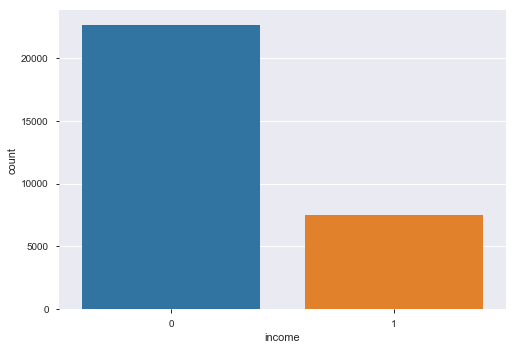

In [82]:
#the above results indicate that the model is probably overfitting the data. If we look at the distribution of '0' & '1' we can see that the data is imbalanced

sns.countplot(income['income'],label='Count')
income.income.value_counts()

In [83]:
from imblearn.over_sampling import SMOTE

In [84]:
from collections import Counter

In [85]:
#Using oversampling technique as we have an imbalanced dataset

sm = SMOTE(random_state=42)
X_res1, y_res1 = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res1))

Resampled dataset shape Counter({1: 15900, 0: 15900})


In [86]:
tree1 = DecisionTreeClassifier(criterion='gini', random_state=42)
tree1.fit(X_res1, y_res1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [87]:
y_pred1 = pred(X_test, tree1)

In [88]:
y_pred1.shape

(9049,)

In [89]:
y_test.shape

(9049,)

In [90]:
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      6754
           1       0.45      0.76      0.57      2295

    accuracy                           0.70      9049
   macro avg       0.67      0.72      0.67      9049
weighted avg       0.78      0.70      0.72      9049

[[4622 2132]
 [ 542 1753]]


In [91]:
print("Accuracy on training set: {:.3f}".format(tree1.score(X_res1, y_res1)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.704


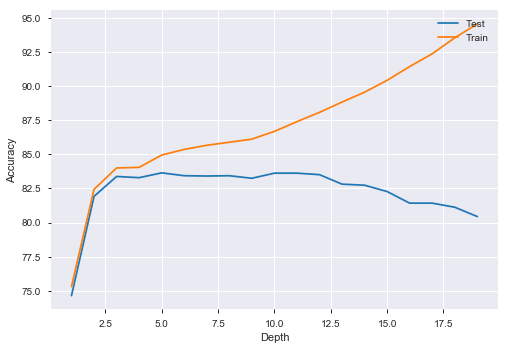

In [92]:
#as seen from confusion matrix above over-sampling decreased the test accuracy the training accuracy decreased considerably. The model is less overfitted now
#next we can try pruning the tree
#plot depth vs accuracy

test_acc = []
train_acc = []
depth = []
for i in range(1,20):
    tree = dec_tree(X_train, y_train, i)
    y_pred_test = pred(X_test, tree)
    y_pred_train = pred(X_train, tree)
    test_acc.append(accuracy_score(y_test,y_pred_test)*100)
    train_acc.append(accuracy_score(y_train,y_pred_train)*100)
    depth.append(i)
    
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth,test_acc, label='Test')
plt.plot(depth,train_acc,label='Train')
plt.legend(loc='upper right')
plt.show()

In [93]:
#let's try max_depth=5

tree_5 = DecisionTreeClassifier(criterion='gini',max_depth=5, random_state=42)
tree_5.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [94]:
pred_5 = tree_5.predict(X_test)

In [95]:
print(classification_report(y_test,pred_5))
print(confusion_matrix(y_test,pred_5))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6754
           1       0.77      0.59      0.67      2295

    accuracy                           0.85      9049
   macro avg       0.82      0.76      0.79      9049
weighted avg       0.85      0.85      0.84      9049

[[6356  398]
 [ 950 1345]]


In [96]:
print("Accuracy on training set: {:.3f}".format(tree_5.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_5.score(X_test, y_test)))

Accuracy on training set: 0.842
Accuracy on test set: 0.851


In [97]:
#Applying K-fold cross validation with 10 splits for model trained with max_depth=4
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
score=cross_val_score(tree_5,X = X_train, y = y_train, cv=kfold)
print('Cross-validation score:{}\n'.format(score))
print('Average Cross-validation score:{}\n'.format(score.mean()))

Cross-validation score:[0.84280303 0.84753788 0.83570076 0.855045   0.83372809 0.84225486
 0.83278067 0.86309806 0.84604453 0.85551871]

Average Cross-validation score:0.8454511586136112



# Boosting

In [98]:
dt = DecisionTreeClassifier(criterion = "gini", random_state = 100) 
clf_boost = AdaBoostClassifier(n_estimators=50,base_estimator=dt,learning_rate=1)
clf_boost.fit(X_train,y_train)
y_pred_boost1 = clf_boost.predict(X_test)
cal_accuracy(y_test, y_pred_boost1)

Confusion Matrix:  [[5881  873]
 [ 965 1330]]
Accuracy Score:  79.68836335506685
Classsification Report:                precision    recall  f1-score   support

           0       0.86      0.87      0.86      6754
           1       0.60      0.58      0.59      2295

    accuracy                           0.80      9049
   macro avg       0.73      0.73      0.73      9049
weighted avg       0.79      0.80      0.80      9049



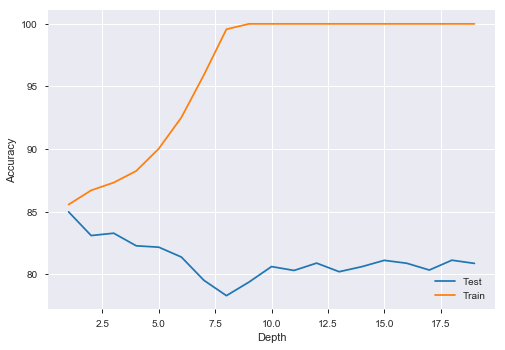

In [99]:
test_acc  = []
train_acc = []
depth = []
for i in range(1,20):
    dt = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=i) 
    clf_boost1 = AdaBoostClassifier(n_estimators=50, base_estimator=dt ,learning_rate=1)
    clf_boost1.fit(X_train,y_train)
    y_pred_boost = clf_boost1.predict(X_test)
    y_pred_boost_train = clf_boost1.predict(X_train)
    test_acc.append(accuracy_score(y_test,y_pred_boost)*100)
    train_acc.append(accuracy_score(y_train,y_pred_boost_train)*100)
    depth.append(i)
    
    
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth,test_acc,label='Test')
plt.plot(depth,train_acc, label='Train')
plt.legend(loc='lower right')
plt.show()

In [100]:
#Decision Tree with best depth
clf_gini = dec_tree(X_train, y_train,2)
y_pred_tree = pred(X_test, clf_gini)
cal_accuracy(y_test, y_pred_tree)

Confusion Matrix:  [[6391  363]
 [1273 1022]]
Accuracy Score:  81.92065421593546
Classsification Report:                precision    recall  f1-score   support

           0       0.83      0.95      0.89      6754
           1       0.74      0.45      0.56      2295

    accuracy                           0.82      9049
   macro avg       0.79      0.70      0.72      9049
weighted avg       0.81      0.82      0.80      9049



In [101]:
dt_2 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=2) 
clf_boost2 = AdaBoostClassifier(n_estimators=50, base_estimator=dt_2 ,learning_rate=1)
clf_boost2.fit(X_train,y_train)
y_pred_boost2 = clf_boost2.predict(X_test)
cal_accuracy(y_test, y_pred_boost2)

Confusion Matrix:  [[6277  477]
 [1052 1243]]
Accuracy Score:  83.10310531550448
Classsification Report:                precision    recall  f1-score   support

           0       0.86      0.93      0.89      6754
           1       0.72      0.54      0.62      2295

    accuracy                           0.83      9049
   macro avg       0.79      0.74      0.76      9049
weighted avg       0.82      0.83      0.82      9049



In [102]:
dt_3 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=2) 
clf_boost3 = AdaBoostClassifier(n_estimators=25, base_estimator=dt_3 ,learning_rate=1)
clf_boost3.fit(X_train,y_train)
y_pred_boost3 = clf_boost3.predict(X_test)
cal_accuracy(y_test, y_pred_boost3)

Confusion Matrix:  [[6287  467]
 [ 903 1392]]
Accuracy Score:  84.86020554757432
Classsification Report:                precision    recall  f1-score   support

           0       0.87      0.93      0.90      6754
           1       0.75      0.61      0.67      2295

    accuracy                           0.85      9049
   macro avg       0.81      0.77      0.79      9049
weighted avg       0.84      0.85      0.84      9049



In [103]:
#Applying K-fold cross validation with 10 splits for model trained with max_depth=2
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10)
score=cross_val_score(clf_boost2,X = X_train, y = y_train, cv=kfold)
print('Cross-validation score:{}\n'.format(score))
print('Average Cross-validation score:{}\n'.format(score.mean()))

Cross-validation score:[0.84327652 0.87263258 0.86316288 0.87115111 0.85267646 0.86594031
 0.85409758 0.86594031 0.86262435 0.86404548]

Average Cross-validation score:0.8615547573676127



# Model Comparison

In [104]:
accuracy=[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,pred_5),accuracy_score(y_test,y_pred_boost3)]
Functions=['SVM_Linear','SVM_rbf','SVM_Sigmoid','Decision_tree','Adaboost']

(0.7, 0.9)

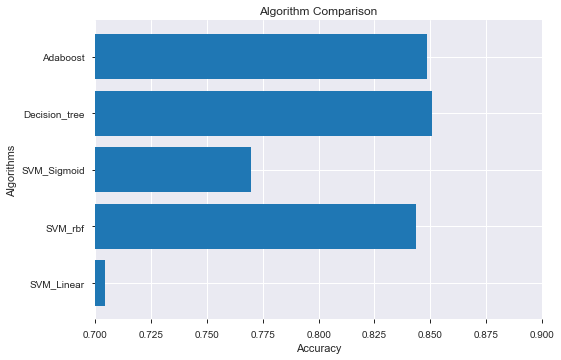

In [105]:
plt.barh(Functions,accuracy,alpha=1)
plt.xlabel("Accuracy")
plt.ylabel("Algorithms")
plt.title("Algorithm Comparison")
plt.xlim([0.7, 0.9])